# Bitcoin Wallets: Your Gateway to the Blockchain

## What is a Bitcoin Wallet?

Think of a Bitcoin wallet like a magical envelope. It can receive money from anyone who knows its address, and it can send money if you know the secret spell (private key). 

In essence, a Bitcoin wallet is a tool that allows you to interact with the Bitcoin network, enabling you to send and receive Bitcoin securely.

## The Anatomy of a Wallet

A Bitcoin wallet consists of three main components:

1. **Private Key**: This is your secret spell. It allows you to access and spend your Bitcoin. Keep it safe!

2. **Public Key**: This is derived from your private key and acts like your bank account number. It’s used to receive Bitcoin and verify ownership.

3. **Wallet Address**: This is a hashed version of your public key, formatted for easy sharing. It’s what you give to others to send you Bitcoin.

### Why Both (public key and wallet address) Are Needed
- **Public Key**: Used for encryption and verification, ensuring secure transactions.
- **Wallet Address**: A shorter, user-friendly representation of the public key, making it easier to share for receiving funds.

Together, they enhance security and usability in the Bitcoin ecosystem.



## Deriving Keys and Address

Here’s how the components of a Bitcoin wallet relate to each other through hashing:

**Private Key  →  ECDSA  →  Public Key  →  SHA-256  →  Hash  →  RIPEMD-160  →  Wallet Address**


### Explanation of the Process

- **ECDSA**: The algorithm used to generate the public key from the private key.
- **Public Key**: Your bank account number in the Bitcoin network.
- **SHA-256**: The first hashing step applied to the public key.
- **Hash**: The result of the SHA-256 hashing.
- **RIPEMD-160**: The second hashing step that produces the wallet address.
- **Wallet Address**: The address you share with others to receive Bitcoin.

## Let’s Create a Wallet!

Now, let’s write some code to create a simple Bitcoin wallet. This code will demonstrate how to generate a key pair and create a wallet address.

In [3]:
# !pip install base58 # run it if any of the libraries are not installed
import hashlib
import ecdsa
import base58
import matplotlib.pyplot as plt

class Wallet:
    def __init__(self):
        self.private_key, self.public_key = self.generate_key_pair()
        self.address = self.generate_address()
        self.balance = 0
        self.transactions = []

    def generate_key_pair(self):
        sk = ecdsa.SigningKey.generate(curve=ecdsa.SECP256k1)
        vk = sk.get_verifying_key()
        return sk.to_string().hex(), vk.to_string().hex()

    def generate_address(self):
        public_key_bytes = bytes.fromhex(self.public_key)
        sha256_hash = hashlib.sha256(public_key_bytes).digest()
        ripemd160_hash = hashlib.new('ripemd160', sha256_hash).digest()
        version_byte = b'\x00'
        payload = version_byte + ripemd160_hash
        checksum = hashlib.sha256(hashlib.sha256(payload).digest()).digest()[:4]
        binary_address = payload + checksum
        return base58.b58encode(binary_address).decode('utf-8')

    def create_transaction(self, recipient_address, amount):
        if amount > self.balance:
            raise ValueError("Not enough funds!")
        
        transaction = {
            "from": self.address,
            "to": recipient_address,
            "amount": amount
        }
        self.balance -= amount
        self.transactions.append(transaction)
        return transaction

### Key Parts of the Code Explained

1. **Wallet Class**: Represents a Bitcoin wallet.
   - **Attributes**:
     - `private_key`: Your secret key for spending Bitcoin.
     - `public_key`: Your public key derived from the private key.
     - `address`: The wallet address derived from the public key.
     - `balance`: The current balance of the wallet.
     - `transactions`: A list of transactions made from this wallet.

2. **generate_key_pair()**: 
   - **Purpose**: Generates a new ECDSA key pair for the wallet.
   - **Returns**: A private key and a public key.

3. **generate_address()**: 
   - **Purpose**: Creates a wallet address from the public key.
   - **Process**: Uses SHA-256 and RIPEMD-160 hashing to derive the address.

4. **create_transaction(recipient_address, amount)**: 
   - **Purpose**: Creates a new transaction to send Bitcoin.
   - **Checks**: Ensures there are enough funds before proceeding.
   - **Returns**: The transaction details.

This code provides a basic understanding of how Bitcoin wallets function and how they interact with the Bitcoin network.

## Let’s Create a Wallet and Use It!

Now, we’ll create a new wallet and simulate receiving and sending Bitcoin.

In [8]:
# Create a new wallet
my_wallet = Wallet()
print(f"Your Bitcoin Address: {my_wallet.address}")

# Let's pretend we received some bitcoin
my_wallet.balance = 10

# Now let's make some transactions
recipients = ["1BvBMSEYstWetqTFn5Au4m4GFg7xJaNVN2", "3J98t1WpEZ73CNmQviecrnyiWrnqRhWNLy", "bc1qar0srrr7xfkvy5l643lydnw9re59gtzzwf5mdq"]
for i, recipient in enumerate(recipients, 1):
  amount = i * 0.5
  try:
      tx = my_wallet.create_transaction(recipient, amount)
      print(f"Sent {amount} BTC to {recipient}")
  except ValueError as e:
      print(f"Transaction failed: {e}")

print(f"Final balance: {my_wallet.balance} BTC")



Your Bitcoin Address: 18JSicidceLjVGASdU3R4R5VMSiFeaF1aH
Sent 0.5 BTC to 1BvBMSEYstWetqTFn5Au4m4GFg7xJaNVN2
Sent 1.0 BTC to 3J98t1WpEZ73CNmQviecrnyiWrnqRhWNLy
Sent 1.5 BTC to bc1qar0srrr7xfkvy5l643lydnw9re59gtzzwf5mdq
Final balance: 7.0 BTC


## Visualizing the Transactions

Let’s visualize our transactions to better understand how the wallet interacts with the Bitcoin network.

*Note: Understanding the visualization code is not necessary to grasp the core concepts of wallets or Bitcoin. This visualization serves as an additional tool to illustrate the relationship between transactions and wallet balances.*

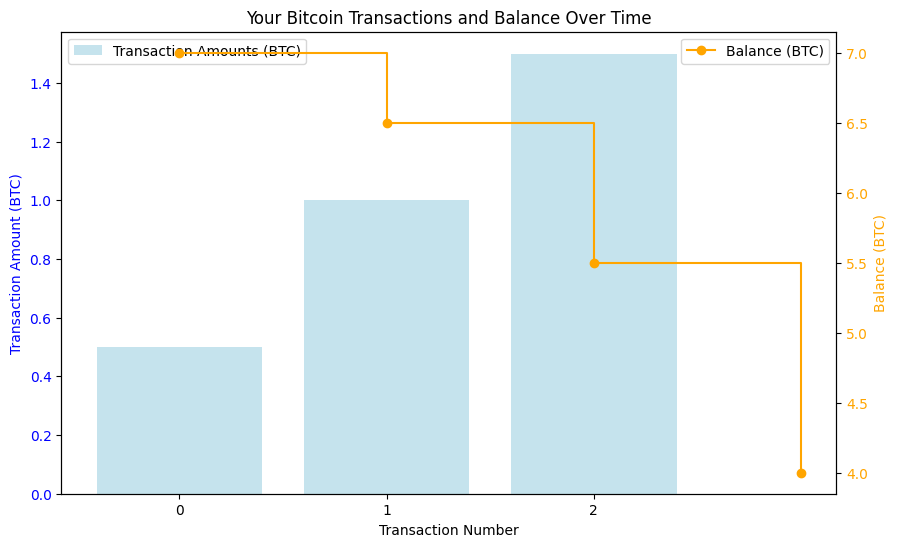

In [14]:
import matplotlib.pyplot as plt

# Prepare data for visualization
transaction_amounts = [tx['amount'] for tx in my_wallet.transactions]
transaction_numbers = list(range(len(my_wallet.transactions)))  # Convert range to list

# Initialize the balance list with the initial balance
initial_balance = my_wallet.balance
balances = [initial_balance]  # Start with the initial balance

# Calculate the balance after each transaction
for amount in transaction_amounts:
  new_balance = balances[-1] - amount  # Deduct the transaction amount
  balances.append(new_balance)

# Create a figure with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot transaction amounts
ax1.bar(transaction_numbers, transaction_amounts, color='lightblue', label='Transaction Amounts (BTC)', alpha=0.7)
ax1.set_xlabel("Transaction Number")
ax1.set_ylabel("Transaction Amount (BTC)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(transaction_numbers)
# Create a second y-axis for the balance
# Use transaction_numbers + [len(transaction_numbers)] to match the length of balances
ax2 = ax1.twinx()
ax2.step(transaction_numbers + [len(transaction_numbers)], balances, where='post', color='orange', marker='o', label='Balance (BTC)')
ax2.set_ylabel("Balance (BTC)", color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add titles and legends
plt.title("Your Bitcoin Transactions and Balance Over Time")
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

## What Did We Learn?

1. **A Bitcoin wallet is essentially a pair of keys**: A public key (your address) and a private key (your secret spell).

2. **The wallet address is derived from the public key**: This involves a series of cryptographic operations.

3. **Transactions decrease your wallet balance**: Each time you send Bitcoin, your balance is updated.

4. **In real life, transactions aren’t final until they’re included in a mined block**: This ensures that the transaction is secure and verified.

5. **You don’t actually store Bitcoin in your wallet**: The wallet stores your keys; the blockchain keeps track of all transactions and balances.

6. **Your private key should never be shared**: It’s the spell that allows spending from your address!

This simple wallet demonstrates the basic concepts, but real Bitcoin wallets have many more features for security and usability.

## Quick Check: Did You Get It?

Let’s see if you caught the main ideas about Bitcoin wallets:

1. What are the two main keys in a Bitcoin wallet? (Hint: One is public, and one is secret)

2. What does the wallet address represent? (Hint: It’s like your bank account number)

3. What happens to your balance when you send Bitcoin? (Hint: It decreases)

Think about your answers, then check below!

<details>
<summary>Click to see the answers</summary>

1. Public key and private key.
2. It represents where you can receive Bitcoin.
3. Your balance decreases.

Congratulations on completing the wallets chapter!